In [1]:
%matplotlib inline


# Fitting an auto_arima model



This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the `datasets` submodule.

.. raw:: html

   <br/>



In [2]:
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# #############################################################################
# Load the data and split it into separate pieces
data = pm.datasets.load_lynx()
train, test = model_selection.train_test_split(data, train_size=90)

# Fit a simple auto_arima model with m=12 as there are seasonal pattern repeating at every 12 months
model = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                     max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True, m=12,
                     d=None, D=1, max_D=10, 
                     trace=True, stepwise=True, suppress_warnings=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1432.919, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1371.066, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1430.945, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1385.925, Time=0.02 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1364.096, Time=0.70 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1353.390, Time=1.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=1343.625, Time=3.27 sec
 ARIMA(1,0,0)(4,1,1)[12] intercept   : AIC=inf, Time=5.44 sec
 ARIMA(1,0,0)(3,1,2)[12] intercept   : AIC=1345.611, Time=3.10 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=1352.473, Time=1.46 sec
 ARIMA(1,0,0)(4,1,0)[12] intercept   : AIC=1

In [6]:
# To print the summary 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   90
Model:             SARIMAX(2, 0, 0)x(3, 1, 0, 12)   Log Likelihood                -652.968
Date:                            Thu, 18 Feb 2021   AIC                           1317.935
Time:                                    15:54:51   BIC                           1332.076
Sample:                                         0   HQIC                          1323.596
                                             - 90                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1187      0.090     12.417      0.000       0.942       1.295
ar.L2         -0.5597      0.113     -4.972      0.000      -0.780      -0.339
ar.S.L12      -0.7923      0.140     -5.656      0.000      -1.067      -0.518
ar.S.L24      -0.5883      0.162     -3.642      0.000      -0.905      -0.272
ar.S.L36      -0.4890      0.109     -4.474      0.000      -0.703      -0.275
sigma2      9.486e+05   1.34e+05      7.058      0.000    6.85e+05    1.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                28.33
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.94
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# Create predictions for the future, evaluate on test
prediction, coef_int = model.predict(n_periods=test.shape[0], return_conf_int=True)

# Print the error:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, prediction)))

Test RMSE: 1259.204


Text(0.5, 0, 'Year')

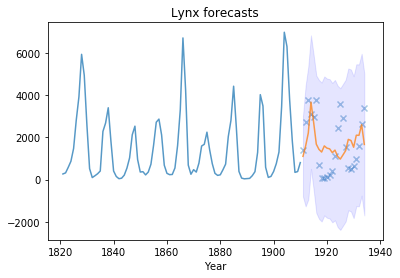

In [9]:
# #############################################################################
# Plot the points and the forecasts
x_axis = np.arange(train.shape[0] + prediction.shape[0])
x_years = x_axis + 1821  # Year starts at 1821


plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
plt.plot(x_years[x_axis[train.shape[0]:]], prediction, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[train.shape[0]:]], test,alpha=0.4, marker='x')  # Test data

plt.fill_between(x_years[x_axis[-prediction.shape[0]:]],coef_int[:, 0], coef_int[:, 1], alpha=0.1, color='b')

plt.title("Lynx forecasts")
plt.xlabel("Year")